In [48]:
import pandas as pd
import seaborn as sns
import numpy  as np
import matplotlib.pyplot as plt
%matplotlib inline

In [49]:
tita=pd.read_csv("C:/Users/raman/Desktop/ml gvp/titanic.csv")

In [50]:
tita.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [51]:
tita.shape

(891, 12)

In [52]:
tita.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [53]:
tita.isnull().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
Fare             0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

In [54]:
tita.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [55]:
#here 687 values in cabin  column are missing which is categorical data
#similarly 2 values in embarked column are missing which is also of object data type(categorucal)
#177 values in age column are missing which is of float datatype

In [56]:
#imputation of missing values
#usually numerical(int and float) missing data is imputed by mean or median
#categorical missing data is imputed by mode

In [57]:
titan=tita.select_dtypes(include=[np.number])
titao=tita.select_dtypes(include=['object'])

In [58]:
titan.Age.fillna(titan.Age.mean(),inplace=True)

C:\Users\raman\Anaconda3\lib\site-packages\pandas\core\generic.py:3549: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [59]:
titao.Embarked.fillna(titao.Embarked.mode()[0],inplace=True)

C:\Users\raman\Anaconda3\lib\site-packages\pandas\core\generic.py:3549: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [60]:
titao.Cabin.fillna(titao.Cabin.mode()[0],inplace=True)

C:\Users\raman\Anaconda3\lib\site-packages\pandas\core\generic.py:3549: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [61]:
titadf=pd.concat([titan,titao],axis=1)

In [62]:
titadf.isnull().sum().sort_values(ascending=False)

Embarked       0
Cabin          0
Ticket         0
Sex            0
Name           0
Fare           0
Parch          0
SibSp          0
Age            0
Pclass         0
Survived       0
PassengerId    0
dtype: int64

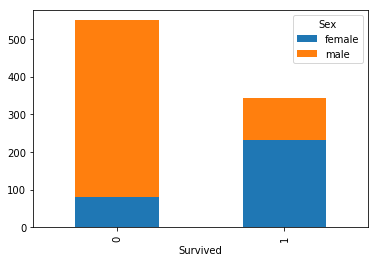

In [63]:
pd.crosstab(titadf.Survived,titadf.Sex).plot(kind="bar",stacked="True")

In [64]:
#from the above graph we can depict that men are more likely to die and women are more likely to survive in this disaster

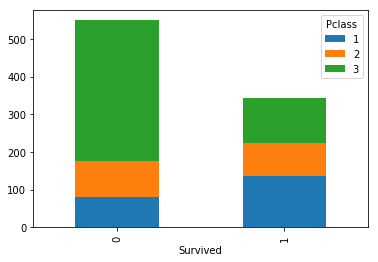

In [65]:
pd.crosstab(titadf.Survived,titadf.Pclass).plot(kind="bar",stacked="True")

In [66]:
#this chart depicts that passengers of third class are more likely to be dead than any other classes
#and passengers of first  class are more likely to be survived than any other classes

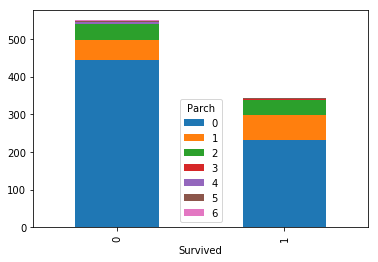

In [67]:
pd.crosstab(titadf.Survived,titadf.Parch).plot(kind="bar",stacked="True")

In [68]:
#conclusion:people who were aboard with no parents and children are more likely to be dead 
#in  similar way, among the survived people,the same category of people are more likely to survive than any other category

In [69]:
#a different conclusion which can be drawn is that most of people aboard are alone

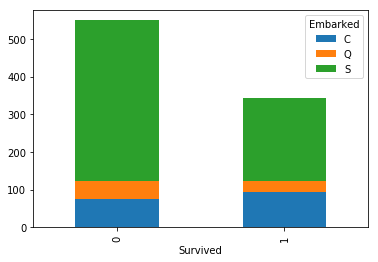

In [70]:
pd.crosstab(titadf.Survived,titadf.Embarked).plot(kind="bar",stacked="True")

In [ ]:
#conclusion:the passenger who aboarded from S are more likely to be dead
#among the survived people,passengers who aboarded from S are more

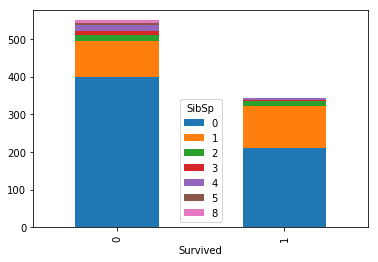

In [71]:
pd.crosstab(titadf.Survived,titadf.SibSp).plot(kind="bar",stacked="True")

In [72]:
#conclusions:people who are aboard with no spouse or siblings are more likely to be dead
#conclusion2:among the survived,the same category of people are more likely to be survived

In [73]:
sns.set()

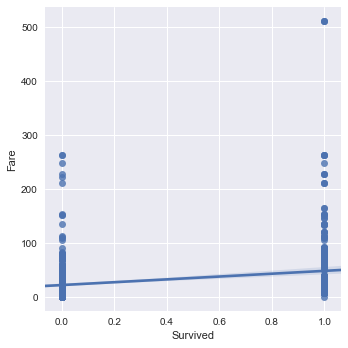

In [74]:
sns.lmplot(x= 'Survived', y= 'Fare', data = tita)

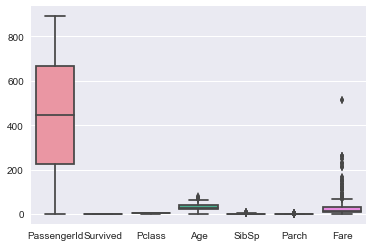

In [76]:
sns.boxplot(data = tita)

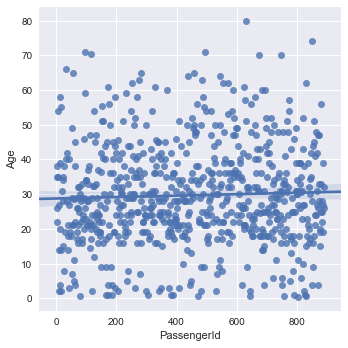

In [77]:
sns.lmplot(x= 'PassengerId', y= 'Age', data = tita)

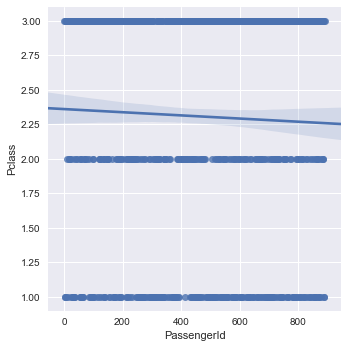

In [78]:
sns.lmplot(x= 'PassengerId', y= 'Pclass', data = tita)

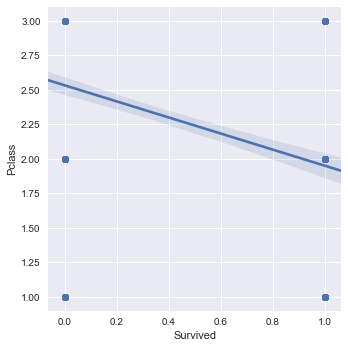

In [79]:
sns.lmplot(x= 'Survived', y= 'Pclass', data = tita)

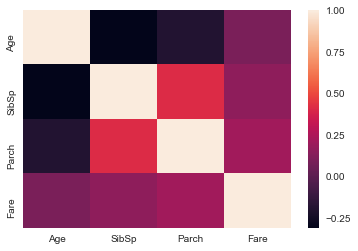

In [80]:
col = list(tita.columns)
stat_df = tita[col[4:-2]]
corr = stat_df.corr()
sns.heatmap(corr)


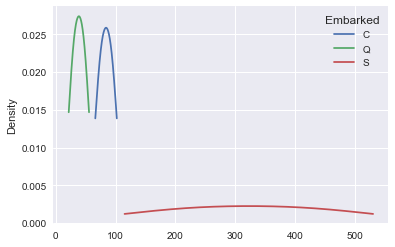

In [82]:
pd.crosstab(titadf.Survived,titadf.Embarked).plot(kind="density",stacked="True")

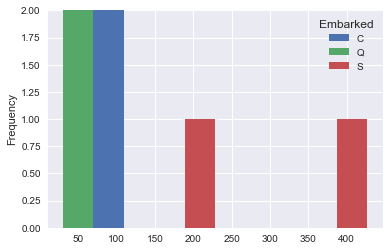

In [83]:
pd.crosstab(titadf.Survived,titadf.Embarked).plot(kind="hist",stacked="True")

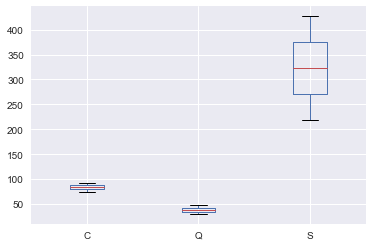

In [84]:
pd.crosstab(titadf.Survived,titadf.Embarked).plot(kind="box",stacked="True")

In [85]:
tita.sort_index(axis=1, ascending=False)

,Ticket,Survived,SibSp,Sex,Pclass,PassengerId,Parch,Name,Fare,Embarked,Cabin,Age
0,A/5 21171,0,1,male,3,1,0,"Braund, Mr. Owen Harris",7.2500,S,NaN,22.0
1,PC 17599,1,1,female,1,2,0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",71.2833,C,C85,38.0
2,STON/O2. 3101282,1,0,female,3,3,0,"Heikkinen, Miss. Laina",7.9250,S,NaN,26.0
3,113803,1,1,female,1,4,0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",53.1000,S,C123,35.0
4,373450,0,0,male,3,5,0,"Allen, Mr. William Henry",8.0500,S,NaN,35.0
5,330877,0,0,male,3,6,0,"Moran, Mr. James",8.4583,Q,NaN,NaN
6,17463,0,0,male,1,7,0,"McCarthy, Mr. Timothy J",51.8625,S,E46,54.0
7,349909,0,3,male,3,8,1,"Palsson, Master. Gosta Leonard",21.0750,S,NaN,2.0
8,347742,1,0,female,3,9,2,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",11.1333,S,NaN,27.0
9,237736,1,1,female,2,10,0,"Nasser, Mrs. Nicholas (Adele Achem)",30.0708,C,NaN,14.0
